# Lab 2- Numpy

Read through the following notebook to get an introduction to numpy: [Numpy Intro](jrjohansson-lectures/Lecture-2-Numpy.ipynb)

## Exercise 2.1

Let start with some basic reshape manipulations. Consider a classification task. We can imagine the training data X consisting of N examples each with M inputs, so the shape of X is (M,N). We usually express the output of the Neural Network, which for the training sample encodes the true class of each of the M examples in X, in a "one-hot" matrix of shape (N,C), where C is the number of classes and each row corresponds to the true class for the corresponding example in X. So for a given row Y[i], all elements are 0 except for the column corresponding to the true class.

For example consider a classification task of separating between 4 classes. We'll call them A, B, C, and D.


In [1]:
import numpy as np

Y=np.array( [ [0, 1, 0, 0], # Class B
              [1, 0, 0, 0], # Class A
              [0, 0, 1, 0], # Class C
              [0, 0, 0, 1]  # Class D
            ])

print "Shape of Y:", Y.shape

Shape of Y: (4, 4)


Lets imagine that we want to change to a 2 classes instead by combining classes A with B and C with D. Use np.reshape and np.sum to create a new vector Y1. Hint: change the shape of Y into (8,2), sum along the correct axes, and change shape to (4,2).

In [2]:
Y1 = Y

Y2 = np.reshape(Y1,(8,2))
Y3 = np.sum(Y2,axis=1)
Y4 = np.reshape(Y3,(4,2))
print Y4




[[1 0]
 [1 0]
 [0 1]
 [0 1]]


## Exercise 2.2

Oftentimes we find that neutral networks work best when their input is mostly between 0,1. Below, we create a random dataset that is normal distributed (mean of 4, sigma of 10). Shift the data so that the mean is 0.5 and 68% of the data lies between 0 and 1.

399.818263591
372.537493718
429.240466759
9.84345822824


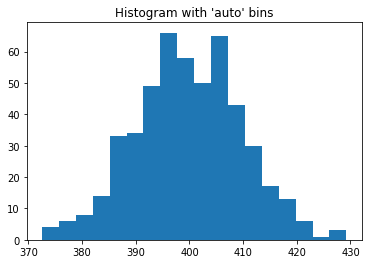

In [3]:
X=np.random.normal(400,10,500)
print np.mean(X)
print np.min(X)
print np.max(X)
print np.std(X)

import matplotlib.pyplot as plt
plt.hist(X, bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram with 'auto' bins")
plt.show()


0.0507951563776
-2.72066678715
3.03980597816


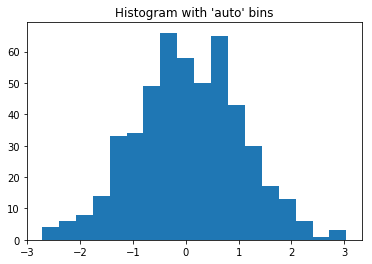

In [4]:

X1=[] # Replace X with your answer

for i,v in enumerate(X):
    X1.append ((v-np.mean(X)+0.5)/np.std(X)) 

np.array(X1)

print np.mean(X1)
print np.min(X1)
print np.max(X1)


plt.hist(X1, bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram with 'auto' bins")
plt.show()


## Exercise 2.3

Using np.random.random and np.random.normal to generate two datasets. Then use np.where to repeat exercise 1.4 showing that one creates a flat distribution and the other does not. 

In [5]:
import numpy as np


#findper gives us the percentage of data point between than two given numbers x and y. 
def findper(n,x,y,N):
    i= (np.where(n<y))
    p = (np.where(n<x))
    return abs((np.size(i)-np.size(p)) *100/N) 

#generating the datasets between 0 and 1 
normal = np.random.normal(0.5,0.125,1000) # sigma of 0.125 means most datapoints are between 0 and 1
flat = np.random.random(1000)

 
def printfun():
    for i in range(10):
        n=[0.1*x for x in range(10)]
        p=[0.1*x -0.1 for x in range(10)]
        print"For the normal dist., the percentage of dataset between {} and {} is {}%".format(n[i],p[i],findper(normal,p[i],n[i],1000))
    print('----------------------------------------------------------------------------------')  
    for i in range(10):
        n=[0.1*x for x in range(10)]
        p=[0.1*x -0.1 for x in range(10)]
        print"For the random dist., the percentage of dataset between {} and {} is {}%".format(n[i],p[i],findper(flat,p[i],n[i],1000))    


printfun()


For the normal dist., the percentage of dataset between 0.0 and -0.1 is 0%
For the normal dist., the percentage of dataset between 0.1 and 0.0 is 0%
For the normal dist., the percentage of dataset between 0.2 and 0.1 is 0%
For the normal dist., the percentage of dataset between 0.3 and 0.2 is 4%
For the normal dist., the percentage of dataset between 0.4 and 0.3 is 16%
For the normal dist., the percentage of dataset between 0.5 and 0.4 is 26%
For the normal dist., the percentage of dataset between 0.6 and 0.5 is 31%
For the normal dist., the percentage of dataset between 0.7 and 0.6 is 15%
For the normal dist., the percentage of dataset between 0.8 and 0.7 is 3%
For the normal dist., the percentage of dataset between 0.9 and 0.8 is 0%
----------------------------------------------------------------------------------
For the random dist., the percentage of dataset between 0.0 and -0.1 is 0%
For the random dist., the percentage of dataset between 0.1 and 0.0 is 11%
For the random dist., 

## Exercise 2.4

Now lets play with some real data. We will load a file of example Neutrino interactions in LArTPC detector. There are 2 read out planes in the detector with 240 wires each, sampled 4096 times. Shift the images in the same way as exercise 2.2.

In [6]:
import h5py
f=h5py.File("/data/LArIAT/h5_files/nue_CC_3-1469384613.h5","r")
print f.keys()

images=f["features"]
print images.shape
print images.size


#downsample 4096 to 256 buy taking every 16th readout 
new_image = images[::,::,::,::16]
print new_image.shape
print new_image.size



[u'Eng', u'Track_length', u'enu_truth', u'features', u'lep_mom_truth', u'mode_truth', u'pdg']
(2500, 2, 240, 4096)
4915200000
(2500, 2, 240, 256)


In [7]:
mean_ = np.mean(new_image)
min_ = np.min(new_image)
max_ = np.max(new_image)

In [44]:
print mean_
print min_
print max_

1.1055
-1338.0
3696.0


In [45]:
print np.shape(new_image)


for x in np.nditer(new_image,op_flags=['readwrite'], flags=['external_loop','buffered']):
        x[...]= (x - mean_)/(max_-min_)
print new_image

(2500, 2, 240, 256)
[[[[-0.0002197 -0.0002197 -0.0002197 ..., -0.0002197 -0.0002197 -0.0002197]
   [-0.0002197 -0.0002197 -0.0002197 ..., -0.0002197 -0.0002197 -0.0002197]
   [-0.0002197 -0.0002197 -0.0002197 ..., -0.0002197 -0.0002197 -0.0002197]
   ..., 
   [-0.0002197 -0.0002197 -0.0002197 ..., -0.0002197 -0.0002197 -0.0002197]
   [-0.0002197 -0.0002197 -0.0002197 ..., -0.0002197 -0.0002197 -0.0002197]
   [-0.0002197 -0.0002197 -0.0002197 ..., -0.0002197 -0.0002197 -0.0002197]]

  [[-0.0002197 -0.0002197 -0.0002197 ..., -0.0002197 -0.0002197 -0.0002197]
   [-0.0002197 -0.0002197 -0.0002197 ..., -0.0002197 -0.0002197 -0.0002197]
   [-0.0002197 -0.0002197 -0.0002197 ..., -0.0002197 -0.0002197 -0.0002197]
   ..., 
   [-0.0002197 -0.0002197 -0.0002197 ..., -0.0002197 -0.0002197 -0.0002197]
   [-0.0002197 -0.0002197 -0.0002197 ..., -0.0002197 -0.0002197 -0.0002197]
   [-0.0002197 -0.0002197 -0.0002197 ..., -0.0002197 -0.0002197 -0.0002197]]]


 [[[-0.0002197 -0.0002197 -0.0002197 ..., -0